In [1]:
import os.path as osp
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
sys.path.insert(0, "../src/")


In [2]:
# Plot params
mpl.style.use("seaborn-dark")
mpl.rcParams['axes.grid'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.dpi'] = 85
mpl.rcParams['axes.labelsize'] = 'large'

# This is the largest possible value of the logloss
logloss_inf_limit = -np.log(np.finfo('float').eps) 


In [3]:
def plot_task_results(df: pd.DataFrame, properties_in: list, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    num_features = df['num_features'].iloc[0]
    ymin,ymax = np.inf,-np.inf
    
    for l in properties_in:
        attr,label = l['column_name'], l['label']
        if attr in df:
            ax.plot(df['trainset_size'], df[attr], label=label)
            ymin,ymax = min(ymin, df[attr].min()),max(ymax, df[attr].max())

    ax.axvline(x=num_features, color='r', label='Num Features', linewidth=1.0, linestyle='--')
    ax.set_yscale('log')
    ax.set_xscale('log')

    #     # student t test 
    #     lower, upper = st.t.interval(0.95, results_df[attr + '_mn'], loc=dataset_df[attr + '_mn'],
    #                                  scale=dataset_df[attr + '_mn_sem'])
    #     ax.fill_between(results_df['trainset_size'], lower, upper, color='C0', alpha=.1)
    #     lower, upper = st.t.interval(0.95, results_df[attr + '_mdl'], loc=dataset_df[attr + '_mdl'],
    #                                  scale=dataset_df[attr + '_mdl_sem'])
    #     ax.fill_between(results_df['trainset_size'], lower, upper, color='C1', alpha=.08)
    ax.set_ylim(ymin, ymax)
    return ax


In [46]:
# Define result path

# adaptive var
res_path = osp.join('..', 'output', 'real_data_20200710_092135', 'results.csv')

# With real data not addaptive
res_path = osp.join('..', 'output', 'real_data_20200728_080745', 'results.csv')

# With real single data addpative
res_path = osp.join('..', 'output', 'real_data_20200728_110740', 'results.csv')


In [47]:
res_df = pd.read_csv(res_path)
dataset_names = res_df['dataset_name'].unique()
print(dataset_names)

res_df = res_df.sort_values(by=['num_features', 'trainset_size', 'dataset_name'], ascending=[False, True, True])
print(res_df.columns)

properties = [{'column_name': 'mn_mean', 'label': 'Minimum Norm'},
             {'column_name': 'analytical_pnml_mean', 'label': 'Analytical pNML'},
             {'column_name': 'analytical_pnml_isit_mean', 'label': 'Analytical pNML ISIT'},
             {'column_name': 'genie_mean', 'label': 'Genie'},
             {'column_name': 'empirical_pnml_mean', 'label': 'Empirical pNML'},
             {'column_name': 'mdl_mean', 'label': 'MDL'},
             {'column_name': 'lambda_pnml_mean', 'label': 'Lambda pNML'}]

# MSE properties
mse_properties = copy.deepcopy(properties)
for l in mse_properties:
    l['column_name'] = 'test_mse_' + l['column_name']
print()
print('mse_properties:')
[print(l) for l in mse_properties];


# Logloss properties

logloss_properties = copy.deepcopy(properties)
for l in logloss_properties:
    l['column_name'] = 'test_logloss_' + l['column_name']
print()
print('logloss_properties:')
[print(l) for l in logloss_properties];

res_df.head()

['645_fri_c3_500_50']
Index(['dataset_name', 'trainset_size', 'valset_size', 'testset_size',
       'num_features', 'n_trails', 'time', 'task_index', 'num_tasks',
       'test_mse_mn_mean', 'test_mse_mn_std', 'test_mse_mn_sem',
       'train_mse_mn_mean', 'train_mse_mn_std', 'train_mse_mn_sem',
       'theta_norm_mn_mean', 'theta_norm_mn_std', 'theta_norm_mn_sem',
       'test_logloss_mn_mean', 'test_logloss_mn_std', 'test_logloss_mn_sem',
       'variance_mn_mean', 'variance_mn_std', 'variance_mn_sem',
       'test_logloss_genie_mean', 'test_logloss_genie_std',
       'test_logloss_genie_sem', 'test_mse_genie_mean', 'test_mse_genie_std',
       'test_mse_genie_sem', 'theta_norm_genie_mean', 'theta_norm_genie_std',
       'theta_norm_genie_sem', 'regret_empirical_pnml_mean',
       'regret_empirical_pnml_std', 'regret_empirical_pnml_sem',
       'test_logloss_empirical_pnml_mean', 'test_logloss_empirical_pnml_std',
       'test_logloss_empirical_pnml_sem', 'regret_analytical_pnml_mean'

,dataset_name,trainset_size,valset_size,testset_size,num_features,n_trails,time,task_index,num_tasks,test_mse_mn_mean,...,train_mse_mdl_sem,theta_norm_mdl_mean,theta_norm_mdl_std,theta_norm_mdl_sem,test_logloss_mdl_mean,test_logloss_mdl_std,test_logloss_mdl_sem,variance_mdl_mean,variance_mdl_std,variance_mdl_sem
0,645_fri_c3_500_50,3,100,100,51,5,1360.231470,0,73,1.063247,...,0.039883,0.094840,0.087606,0.043803,1.434172,0.041818,0.020909,0.996782,0.024868,0.012434
1,645_fri_c3_500_50,4,100,100,51,5,1356.244927,1,73,1.082137,...,0.029198,0.098251,0.048763,0.024381,1.394635,0.067955,0.033977,1.004809,0.081184,0.040592
2,645_fri_c3_500_50,5,100,100,51,5,1322.222396,2,73,0.949171,...,0.037318,0.089411,0.073431,0.036715,1.374641,0.045602,0.022801,0.987222,0.056345,0.028173
3,645_fri_c3_500_50,6,100,100,51,5,1402.105374,3,73,1.140472,...,0.035310,0.159875,0.133452,0.066726,1.419412,0.068795,0.034397,0.955547,0.064738,0.032369
4,645_fri_c3_500_50,7,100,100,51,5,1357.152887,4,73,1.067804,...,0.014222,0.103865,0.077610,0.038805,1.402640,0.044712,0.022356,0.984371,0.050286,0.025143


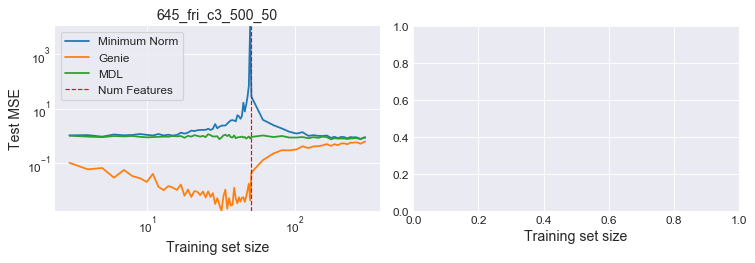

In [48]:
w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, 0.8*h * row_num))
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df,mse_properties, ax=ax)
    ax.set_title(dataset_name)

axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel('Test MSE') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()


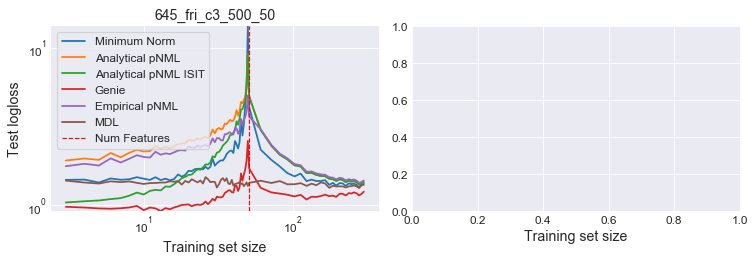

In [49]:
w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, 0.8*h * row_num))
# fig, axs = plt.subplots(1, 1, figsize=(1.5 * w, 0.8*h * row_num))
# axs = np.array(axs)
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df, logloss_properties, ax=ax)
    ax.set_title(dataset_name)
#     ax.set_xscale('linear')
#     ax.set_yscale('linear')
    if ax.get_ylim()[-1] > 0.95* logloss_inf_limit:
        ax.set_ylim(top=0.95* logloss_inf_limit)  # set limit based on machine precision
axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel('Test logloss') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()


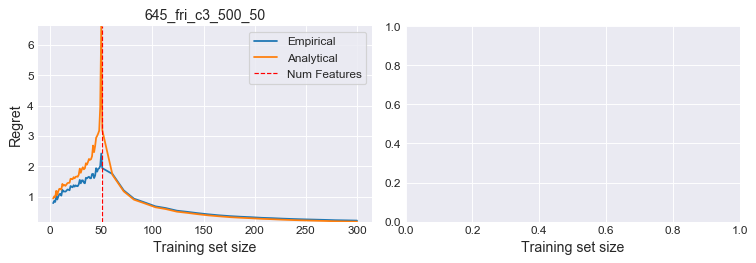

In [50]:
regret_properties = [{'column_name': 'regret_empirical_pnml_mean', 'label': 'Empirical'},
                     {'column_name': 'regret_analytical_pnml_mean', 'label': 'Analytical'}                  ]

w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, 0.8*h * row_num))
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df, regret_properties, ax=ax)
    ax.set_title(dataset_name)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    if ax.get_ylim()[-1] > 0.95* logloss_inf_limit:
        ax.set_ylim(top=0.95* logloss_inf_limit)  # set limit based on machine precision
axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel('Regret') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()

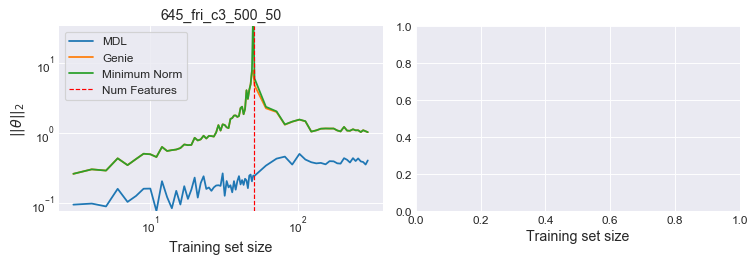

In [51]:
# Theta norm

regret_properties = [{'column_name': 'theta_norm_mdl_mean', 'label': 'MDL'},
                     {'column_name': 'theta_norm_genie_mean', 'label': 'Genie'},
                    {'column_name': 'theta_norm_mn_mean', 'label': 'Minimum Norm'}]

w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, 0.8*h * row_num))
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df, regret_properties, ax=ax)
    ax.set_title(dataset_name)
#     ax.set_xscale('linear')
#     ax.set_yscale('linear')
    if ax.get_ylim()[-1] > 0.95* logloss_inf_limit:
        ax.set_ylim(top=0.95* logloss_inf_limit)  # set limit based on machine precision
axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel(r'$||\theta||_2$') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()